In [1033]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [1034]:
D_data = pd.read_csv("C:\Data Analysis - Files\Bike-datasheet\CBS_2021-2023_Daily_Weather.csv")
D_data.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [1035]:
##weekday column
# Convert the 'Date' column to datetime format
D_data['Date'] = pd.to_datetime(D_data['Date'])

# Create the 'Weekday' column by applying the .weekday() method
D_data['WeekdayNum'] = D_data['Date'].dt.weekday

D_data['Year'] = D_data['Date'].dt.year

def get_season (date):
    month = date.month
    if month in [12,1,2]:
        return 1
    elif month in [3,4,5]:
        return 2
    elif month in [6,7,8]:
        return 3
    elif month in [9,10,11]: 
        return 4
    
D_data['Season'] = D_data['Date'].apply(get_season)

import holidays
us_holidays = holidays.US()
D_data['Holiday'] = D_data['Date'].apply(lambda value: value in us_holidays)

D_data['Season_year'] = D_data['Season'].astype(str) + "-" + D_data['Year'].astype(str)
    
D_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
 8   WeekdayNum                      1095 non-null   int32         
 9   Year                            1095 non-null   int32         
 10  Season                          1095 non-null   int64         
 11  Holi

In [1036]:
D_data.head()


,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),WeekdayNum,Year,Season,Holiday,Season_year
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,4,2021,1,True,1-2021
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,5,2021,1,False,1-2021
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,6,2021,1,False,1-2021
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,0,2021,1,False,1-2021
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,1,False,1-2021


<Axes: >

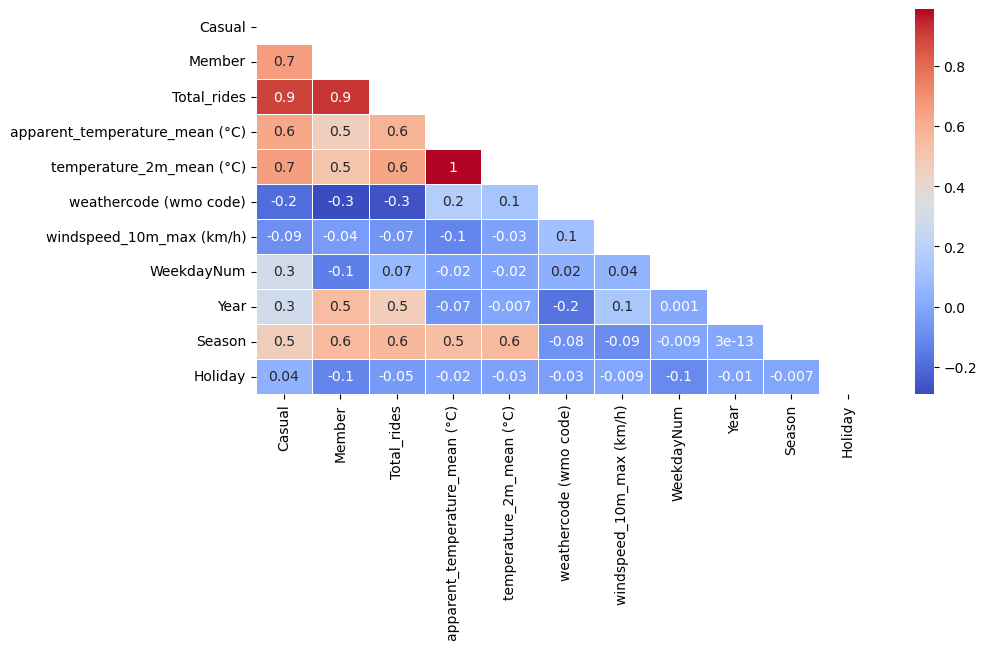

In [1037]:
plt.figure(figsize=(10,5), dpi=100)
D_matrix = np.triu(D_data.corr(numeric_only=True))
sns.heatmap(D_data.corr(numeric_only=True), mask= D_matrix, cmap='coolwarm',fmt='.1g', annot=True, linewidths=0.5)

In [1038]:
D_data = D_data.drop(columns=['temperature_2m_mean (°C)','Casual','Year','windspeed_10m_max (km/h)','Date','Member','Season'],axis=1)
#D_data = D_data.drop(columns='Season_year',axis=1)

In [1039]:
D_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Total_rides                     1095 non-null   int64  
 1   apparent_temperature_mean (°C)  1095 non-null   float64
 2   weathercode (wmo code)          1095 non-null   int64  
 3   WeekdayNum                      1095 non-null   int32  
 4   Holiday                         1095 non-null   bool   
 5   Season_year                     1095 non-null   object 
dtypes: bool(1), float64(1), int32(1), int64(2), object(1)
memory usage: 39.7+ KB


<Axes: >

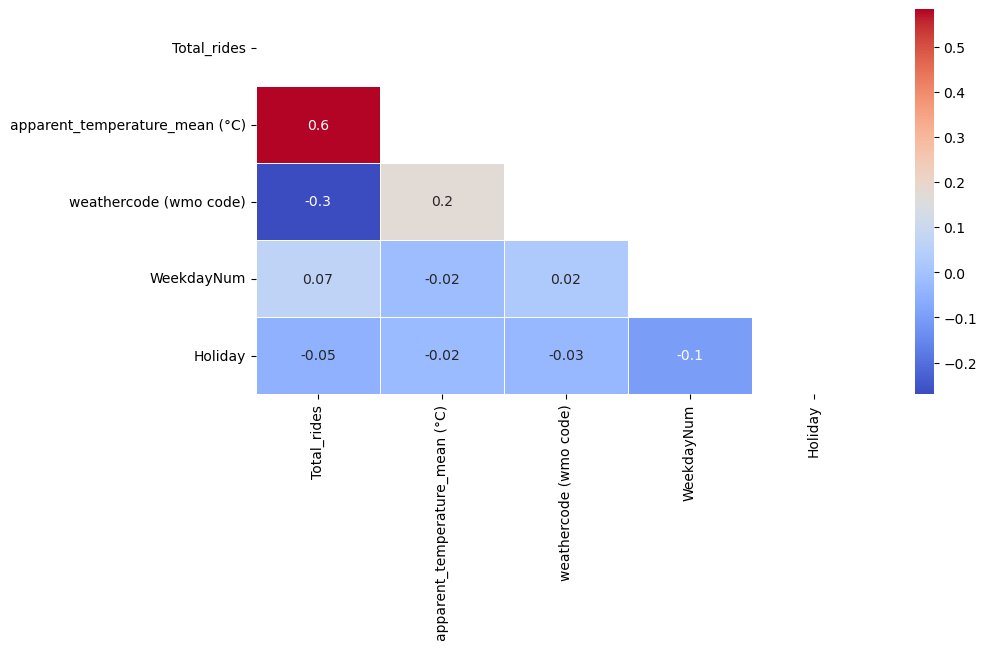

In [1040]:
plt.figure(figsize=(10,5), dpi=100)
D_matrix = np.triu(D_data.corr(numeric_only=True))
sns.heatmap(D_data.corr(numeric_only=True), mask= D_matrix, cmap='coolwarm',fmt='.1g', annot=True, linewidths=0.5)

In [1041]:
D_data = pd.get_dummies(D_data)

In [1042]:
D_data.head()

,Total_rides,apparent_temperature_mean (°C),weathercode (wmo code),WeekdayNum,Holiday,Season_year_1-2021,Season_year_1-2022,Season_year_1-2023,Season_year_2-2021,Season_year_2-2022,Season_year_2-2023,Season_year_3-2021,Season_year_3-2022,Season_year_3-2023,Season_year_4-2021,Season_year_4-2022,Season_year_4-2023
0,961,-0.9,63,4,True,True,False,False,False,False,False,False,False,False,False,False,False
1,5718,4.8,61,5,False,True,False,False,False,False,False,False,False,False,False,False,False
2,1628,0.9,63,6,False,True,False,False,False,False,False,False,False,False,False,False,False
3,2981,1.0,3,0,False,True,False,False,False,False,False,False,False,False,False,False,False
4,3061,1.4,51,1,False,True,False,False,False,False,False,False,False,False,False,False,False


In [1043]:
D_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Total_rides                     1095 non-null   int64  
 1   apparent_temperature_mean (°C)  1095 non-null   float64
 2   weathercode (wmo code)          1095 non-null   int64  
 3   WeekdayNum                      1095 non-null   int32  
 4   Holiday                         1095 non-null   bool   
 5   Season_year_1-2021              1095 non-null   bool   
 6   Season_year_1-2022              1095 non-null   bool   
 7   Season_year_1-2023              1095 non-null   bool   
 8   Season_year_2-2021              1095 non-null   bool   
 9   Season_year_2-2022              1095 non-null   bool   
 10  Season_year_2-2023              1095 non-null   bool   
 11  Season_year_3-2021              1095 non-null   bool   
 12  Season_year_3-2022              10

In [1044]:
Temp = D_data[['Total_rides','apparent_temperature_mean (°C)']]
display(Temp.head())
display(Temp.shape)

,Total_rides,apparent_temperature_mean (°C)
0,961,-0.9
1,5718,4.8
2,1628,0.9
3,2981,1.0
4,3061,1.4


(1095, 2)

In [1045]:
## if want to compare only two features the shpe of features need to be checked. 
# as one feature is input and one feature is output. so one iput feature should not be as array.

#Member = D_data['Member'].values.reshape(-1,1)
Total_rides = D_data['Total_rides'].values.reshape(-1,1)
apparent_temperature_mean = D_data['apparent_temperature_mean (°C)'].values.reshape(-1,1)
weathercode = D_data['weathercode (wmo code)'].values.reshape(-1,1)
Weekday = D_data['WeekdayNum'].values.reshape(-1,1)
Holiday = D_data['Holiday'].values.reshape(-1,1)

In [1046]:
## need to check shape of all features

display(Total_rides.shape)
display(Holiday.shape)


(1095, 1)

(1095, 1)

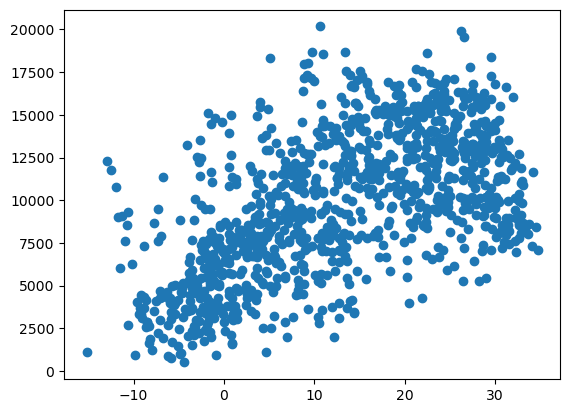

In [1047]:
plt.scatter(apparent_temperature_mean,Total_rides)

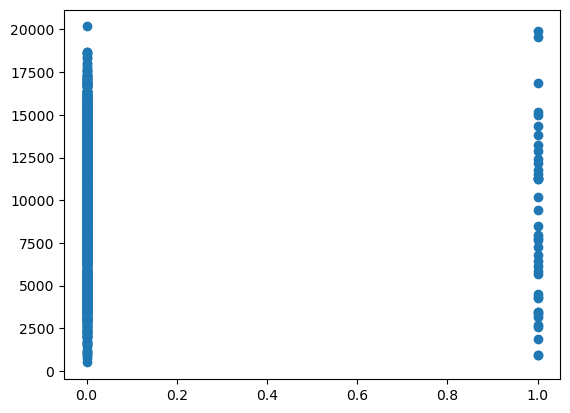

In [1048]:
plt.scatter(Holiday,Total_rides)

In [1049]:
print(D_data.isnull().sum())

Total_rides                       0
apparent_temperature_mean (°C)    0
weathercode (wmo code)            0
WeekdayNum                        0
Holiday                           0
Season_year_1-2021                0
Season_year_1-2022                0
Season_year_1-2023                0
Season_year_2-2021                0
Season_year_2-2022                0
Season_year_2-2023                0
Season_year_3-2021                0
Season_year_3-2022                0
Season_year_3-2023                0
Season_year_4-2021                0
Season_year_4-2022                0
Season_year_4-2023                0
dtype: int64


In [1050]:
D_data.head()

,Total_rides,apparent_temperature_mean (°C),weathercode (wmo code),WeekdayNum,Holiday,Season_year_1-2021,Season_year_1-2022,Season_year_1-2023,Season_year_2-2021,Season_year_2-2022,Season_year_2-2023,Season_year_3-2021,Season_year_3-2022,Season_year_3-2023,Season_year_4-2021,Season_year_4-2022,Season_year_4-2023
0,961,-0.9,63,4,True,True,False,False,False,False,False,False,False,False,False,False,False
1,5718,4.8,61,5,False,True,False,False,False,False,False,False,False,False,False,False,False
2,1628,0.9,63,6,False,True,False,False,False,False,False,False,False,False,False,False,False
3,2981,1.0,3,0,False,True,False,False,False,False,False,False,False,False,False,False,False
4,3061,1.4,51,1,False,True,False,False,False,False,False,False,False,False,False,False,False


In [1051]:
## LR Model traing and evaluating

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming D_data is your dataset
X = D_data[['Holiday']]  # Features (drop 'Total_rides' from data)
y = D_data['Total_rides']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Linear Regression model
reg_rides = LinearRegression()

# Fit the model to the training data
reg_rides.fit(X_train, y_train)

# Evaluate the model by calculating the R-squared score (coefficient of determination)
reg_rides_Score = reg_rides.score(X_test, y_test) * 100

# Print the accuracy (R-squared value as percentage)
print('Accuracy of model is:', reg_rides_Score, '%')

# ## prediction

# Holiday = 'True'  # Example input
# Predict_rides = reg_rides.predict([[Holiday]])  # Pass the input as a 2D array with one value

# # Print the prediction and the accuracy
# print(f'For season {Holiday}, total rides are: {Predict_rides[0]} and its accuracy is: {reg_rides_Score}%')


Accuracy of model is: -2.097665862780107 %


In [1052]:
## LR Model traing and evaluating

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming D_data is your dataset
X = D_data.drop('Total_rides', axis=1)  # Features (drop 'Total_rides' from data)
y = D_data['Total_rides']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Linear Regression model
reg_rides = LinearRegression()

# Fit the model to the training data
reg_rides.fit(X_train, y_train)


Y_Predict_rides = reg_rides.predict(X_test) 


In [1053]:
## Liner Regression - Evaluation

# Evaluate the model by calculating the R-squared score (coefficient of determination)
reg_rides_Score = reg_rides.score(X_test, y_test) * 100

from sklearn.metrics import mean_squared_error, r2_score

print ('R2 score :' + '{:.3}'.format(r2_score(y_test,Y_Predict_rides)))
print ('MSE :' + '{:.3}'.format(mean_squared_error(y_test,Y_Predict_rides)))

R2 score :0.776
MSE :4.08e+06


In [1054]:
print(X_test.shape)
print(y_test.shape)
print(Y_Predict_rides.shape)

(219, 16)
(219,)
(219,)


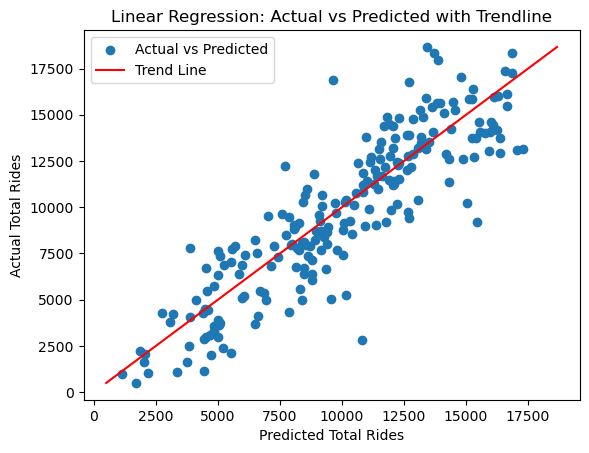

In [1055]:
# Scatter plot: predicted vs actual values
plt.scatter(Y_Predict_rides, y_test, label='Actual vs Predicted')

# Plot the trend line
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red', label='Trend Line')

# Adding labels and title
plt.xlabel('Predicted Total Rides')
plt.ylabel('Actual Total Rides')
plt.title('Linear Regression: Actual vs Predicted with Trendline')

# Display legend
plt.legend()

# Show the plot
plt.show()

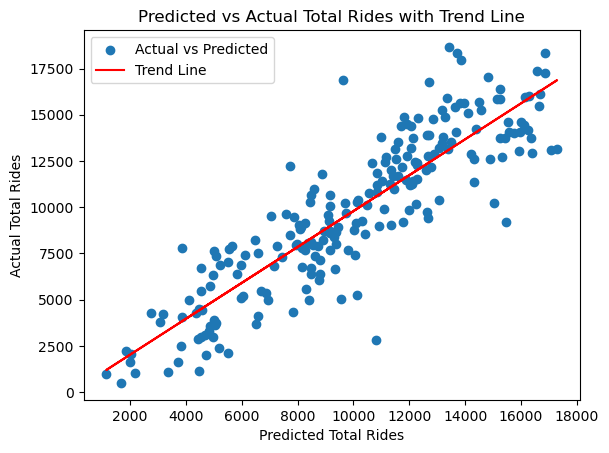

In [1056]:
# Scatter plot: predicted vs actual values
plt.scatter(Y_Predict_rides, y_test, label='Actual vs Predicted')

# Fit a linear regression model to the scatter plot of predicted vs actual values
reg_rides.fit(Y_Predict_rides.reshape(-1, 1), y_test)  # Reshape to 2D array for fitting

# Get the trend line (predicted values for the trend)
trend_line = reg_rides.predict(Y_Predict_rides.reshape(-1, 1))

# Plot the trend line
plt.plot(Y_Predict_rides, trend_line, color='red', label='Trend Line')

# Adding labels and title
plt.xlabel('Predicted Total Rides')
plt.ylabel('Actual Total Rides')
plt.title('Predicted vs Actual Total Rides with Trend Line')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [1057]:
## Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming D_data is your dataset
X = D_data.drop('Total_rides', axis=1)  # Features (drop 'Total_rides' from data)
y = D_data['Total_rides']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate PolynomialFeatures to create polynomial features
degree = 2  # You can change the degree of the polynomial (e.g., 2 for quadratic, 3 for cubic)
poly_features = PolynomialFeatures(degree=degree)

# Transform the features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Instantiate the Linear Regression model
reg_rides_poly = LinearRegression()

# Fit the model to the polynomial-transformed training data
reg_rides_poly.fit(X_train_poly, y_train)

# Evaluate the model by calculating the R-squared score (coefficient of determination)
reg_rides_poly_Score = reg_rides_poly.score(X_test_poly, y_test)

# Predict using the polynomial regression model
Y_Predict_rides_poly = reg_rides_poly.predict(X_test_poly)

print (y_test.shape)
print (Y_Predict_rides_poly.shape)

# Print the accuracy
# there is no accuracy stuff for liner reg.



(219,)
(219,)


In [1058]:
## Evaluate Polynomial model

from sklearn.metrics import mean_absolute_error, mean_squared_error

# R-squared score (already calculated)
print('R-squared score (Polynomial Regression) is:', reg_rides_poly_Score)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, Y_Predict_rides_poly)
print('Mean Absolute Error (MAE):', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, Y_Predict_rides_poly)
print('Mean Squared Error (MSE):', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)


R-squared score (Polynomial Regression) is: 0.8215275037785167
Mean Absolute Error (MAE): 1357.919398617119
Mean Squared Error (MSE): 3248786.541694261
Root Mean Squared Error (RMSE): 1802.4390535311481


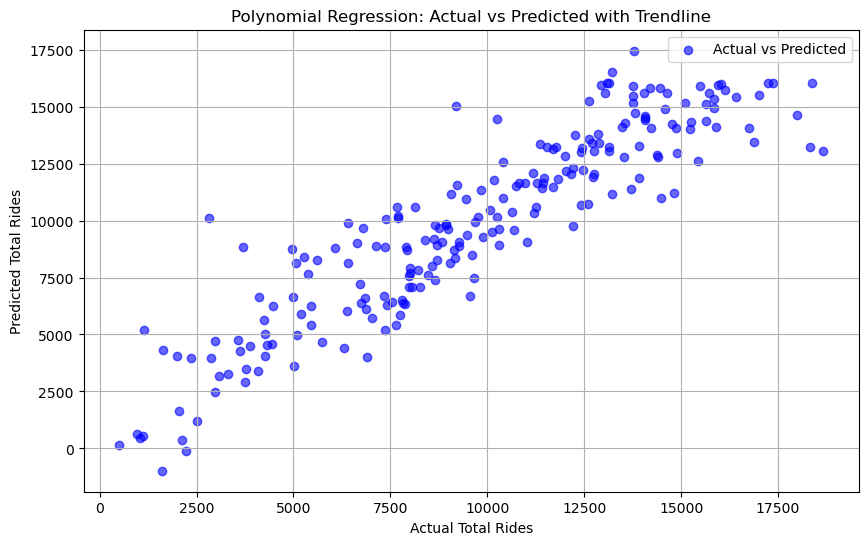

In [1059]:
# Plotting the scatter plot of Actual vs. Predicted for polynomial
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Y_Predict_rides_poly, color='blue', label='Actual vs Predicted', alpha=0.6)

# Plot the trendline
#plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], label='Trendline (Line of Best Fit)', color='red', linestyle='--')

plt.grid(True)
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.title('Polynomial Regression: Actual vs Predicted with Trendline')
plt.legend()
plt.show()

c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but PolynomialFeatures is expecting 16 features as input.

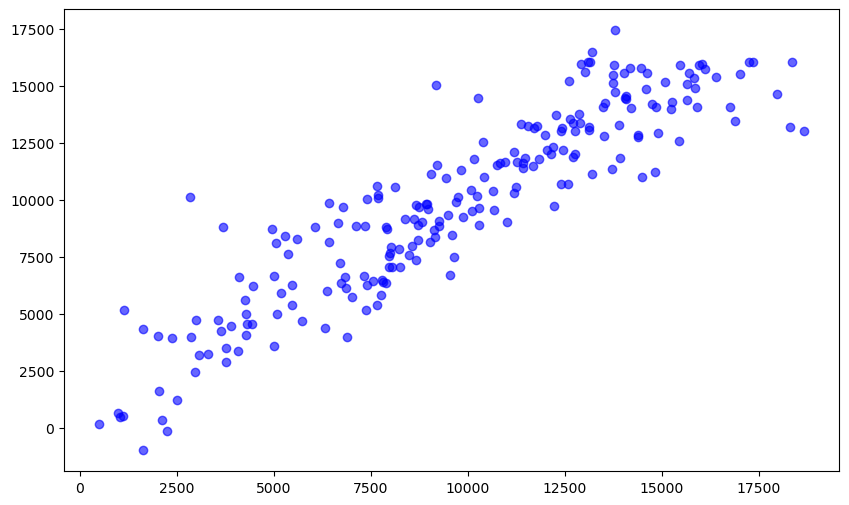

In [1060]:
# Plotting the scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Y_Predict_rides_poly, color='blue', label='Actual vs Predicted', alpha=0.6)

# Generate a range of values for the actual total rides (y_test)
# Create an array of values for the x-axis (actual values)
x_range = np.linspace(y_test.min(), y_test.max(), 500).reshape(-1, 1)

# Predict the corresponding y-values using the polynomial regression model
# For polynomial regression, we transform the x_range into polynomial features
x_range_poly = poly_features.transform(x_range)
y_range_pred = reg_rides_poly.predict(x_range_poly)

# Plot the polynomial regression curve
plt.plot(x_range, y_range_pred, color='red', linewidth=2, label='Polynomial Regression Curve')

# Customize the plot
plt.grid(True)
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.title('Polynomial Regression: Actual vs Predicted with Trendline')
plt.legend()
plt.show()


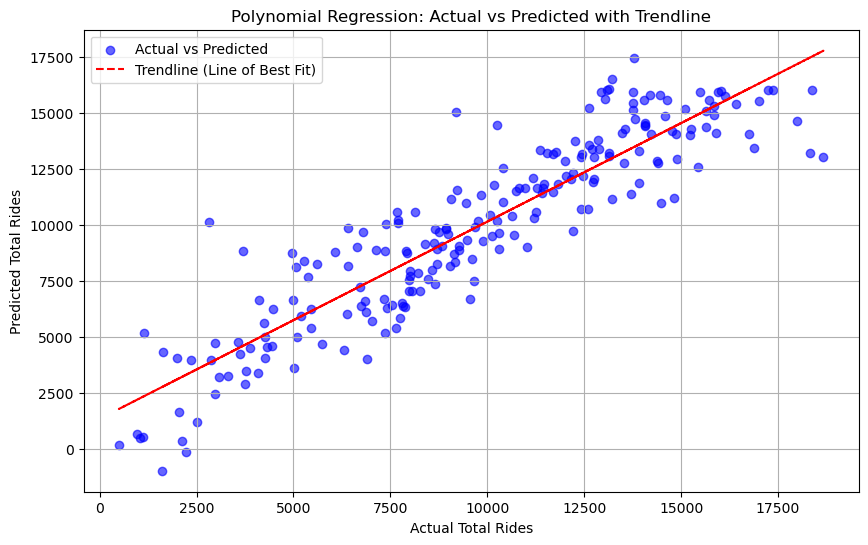

In [ ]:
# Plotting the scatter plot of Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Y_Predict_rides_poly, color='blue', label='Actual vs Predicted', alpha=0.6)

# Fit a linear regression model for the trendline (line of best fit)
linear_reg = LinearRegression()
linear_reg.fit(y_test.values.reshape(-1, 1), Y_Predict_rides_poly)  # Fit on actual vs predicted values

# Get predictions for the trendline
y_trendline = linear_reg.predict(y_test.values.reshape(-1, 1))

# Plot the trendline
plt.plot(y_test, y_trendline, label='Trendline (Line of Best Fit)', color='red', linestyle='--')

plt.grid(True)
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.title('Polynomial Regression: Actual vs Predicted with Trendline')
plt.legend()
plt.show()

c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but PolynomialFeatures is expecting 16 features as input.

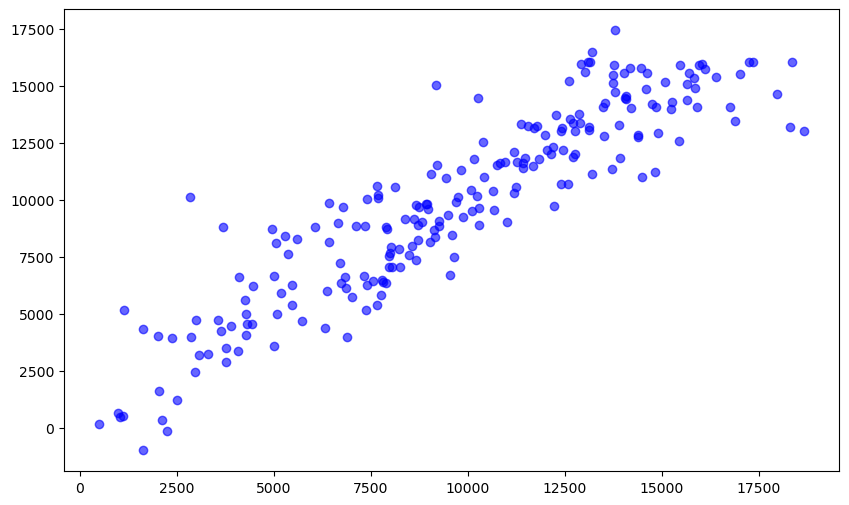

In [ ]:
# Assuming y_test, Y_Predict_rides_poly, poly_features, and reg_rides_poly are already defined

plt.figure(figsize=(10, 6))

# Scatter plot for Actual vs Predicted values
plt.scatter(y_test, Y_Predict_rides_poly, color='blue', label='Actual vs Predicted', alpha=0.6)

# Generate a range of values for the actual total rides (x-axis)
x_range = np.linspace(y_test.min(), y_test.max(), 500).reshape(-1, 1)

# If your model was trained with multiple features, you need to expand x_range to have the same number of features
# This assumes the training data had 4 features, so we need to repeat the single feature to match the expected number of features.
x_range_expanded = np.tile(x_range, (1, 4))  # Replicating x_range to have 4 features

# Transform the expanded range values using the polynomial features
x_range_poly = poly_features.transform(x_range_expanded)

# Predict the corresponding y-values using the regression model
y_range_pred = reg_rides_poly.predict(x_range_poly)

# Plot the polynomial regression trendline
plt.plot(x_range, y_range_pred, color='red', linewidth=2, label='Polynomial Regression Curve')

# Customize the plot for clarity
plt.grid(True)
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.title('Polynomial Regression: Actual vs Predicted with Trendline')

# Display the legend
plt.legend()

# Show the plot
plt.show()

KeyError: 'Total_rides'

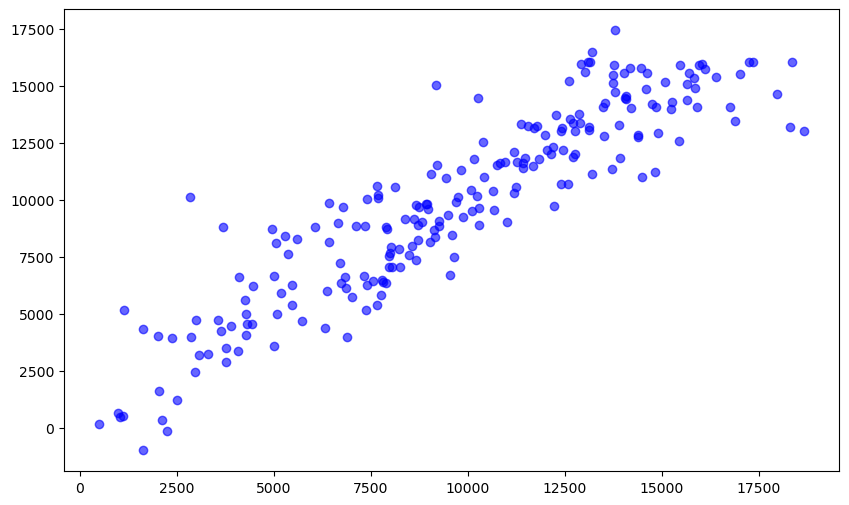

In [ ]:

# Plotting the scatter plot of Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Y_Predict_rides_poly, color='blue', label='Actual vs Predicted', alpha=0.6)
# Choose one of the independent variables for plotting (e.g., a specific feature 'independent_variable')
# Make sure to replace 'independent_variable' with the actual column name you want to plot
independent_variable = 'Total_rides'  # Replace with actual column name

# Generate values for the current independent variable to plot the polynomial regression line
x_range = np.linspace(X[independent_variable].min(), X[independent_variable].max(), 100)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

# Predict the corresponding values from the polynomial regression model
y_range_pred = reg_rides_poly.predict(x_range_poly)

# Plot the polynomial regression line
plt.plot(x_range, y_range_pred, label='Polynomial Regression Line', color='green')

plt.grid(True)
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.title('Polynomial Regression: Actual vs Predicted with Trendline')
plt.legend()
plt.show()

In [ ]:
# Define the day you want to predict for (e.g., Day_Monday = 2 corresponds to Tuesday in encoded form)
Day = 1  # Numeric value representing the day (e.g., 0=Monday, 1=Tuesday, ...)

# Start with a list of zeros for all columns in multivariate
input_features = [0] * len(multivariate.columns)

# Assign the encoded day value to the corresponding column in 'Day_Encoded'
if 'Day_Encoded' in multivariate.columns:
    input_features[multivariate.columns.get_loc('Day_Encoded')] = Day

# Predict the total rides for the given day
pred_2 = reg_multi.predict([input_features])  # Ensure the input is a 2D list

# Extract the scalar value from the prediction array
predicted_value = pred_2[0]  # This converts the 1-element numpy array into a scalar

# Output the prediction with proper formatting
print(f"The predicted demand for bikes on day {Day} (encoded) is approximately: {float(predicted_value):.2f} rides.")